# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неполное среднее', 'Среднее', 'Ученая степень', 'Неоконченное высшее', 'Высшее', 'Среднее специальное', 'Два и более высших образования'}


MARITAL_STATUS
{'Гражданский брак', 'Разведен(а)', 'Вдовец/Вдова', 'Не состоял в браке', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Энергетика', 'Недвижимость', 'Логистика', 'Нефтегазовая промышленность', 'Юридические услуги/нотариальные услуги', 'Транспорт', 'Наука', 'Коммунальное хоз-во/Дорожные службы', 'СМИ/Реклама/PR-агенства', 'Информационные услуги', 'Сельское хозяйство', 'Салоны красоты и здоровья', 'Маркетинг', 'Другие сферы', 'ЧОП/Детективная д-ть', 'Сборочные производства', 'Развлечения/Искусство', 'Управляющая компания', 'Ресторанный бизнес/Общественное питание', 'Здравоохранение', 'Туризм', 'Подбор персонала', 'Металлургия/Промышленность/Машиностроение', 'Государственная служба', 'Химия/Парфюмерия/Фармацевтика', 'Страхование', 'Строительство', 'Информационные технологии', 'Образование', 'Банк/Финансы', 'Торговля'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
df['CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float') #аналогично сделаем для последней суммы кредита
df['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float') #аналогично сделаем для последней суммы кредита
df['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float') #аналогично сделаем для последней суммы кредита
df['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float') #аналогично сделаем для последней суммы кредита
print('done')

done


Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
#Для начала проверим, в каких колонках есть пропуски в данных:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

Видно, что пропуски данных есть в колонках: GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, TP_PROVINCE, WORK_TIME, PREVIOUS_CARD_NUM_UTILIZED, REGION_NM

Судя по описанию колонок, колонки GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, WORK_TIME хранят в себе данные о работе клиента банка, поэтому логично предположить, что они незаполнены у безработных клиентов

In [16]:
#разделяем датафрейм на два, по признаку занятости
WithWork = df[df['SOCSTATUS_WORK_FL'] == 1]
WithoutWork = df[df['SOCSTATUS_WORK_FL'] == 0]

In [17]:
#Необходимо проверить гипотезу о том, что у работающих клиентов все колонки с данными о работе заполнены
WithWork.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27395 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  27395 non-null int64
TARGET                        27395 non-null int64
AGE                           27395 non-null int64
SOCSTATUS_WORK_FL             27395 non-null int64
SOCSTATUS_PENS_FL             27395 non-null int64
GENDER                        27395 non-null int64
CHILD_TOTAL                   27395 non-null int64
DEPENDANTS                    27395 non-null int64
EDUCATION                     27395 non-null object
MARITAL_STATUS                27395 non-null object
GEN_INDUSTRY                  27394 non-null object
GEN_TITLE                     27394 non-null object
ORG_TP_STATE                  27394 non-null object
ORG_TP_FCAPITAL               27394 non-null object
JOB_DIR                       27394 non-null object
FAMILY_INCOME                 27395 non-null object
PERSONAL_INCOME               27395 non-null float64
REG_ADDRESS_PR

1. У работающих клиентов есть только одна запись без (доказательство в блоке ниже) без заполненных реквизитов, связанных с работой. Я считаю, что эту запись можно отнести к "выбросам" и не учитывать её в прогнозах. Оставить эту запись с заполненными значениями по умолчанию будет неверным.

In [18]:
WithWork[WithWork['GEN_INDUSTRY'].isnull()].info() #"корявая запись" по работнику

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 22873 to 22873
Data columns (total 53 columns):
AGREEMENT_RK                  1 non-null int64
TARGET                        1 non-null int64
AGE                           1 non-null int64
SOCSTATUS_WORK_FL             1 non-null int64
SOCSTATUS_PENS_FL             1 non-null int64
GENDER                        1 non-null int64
CHILD_TOTAL                   1 non-null int64
DEPENDANTS                    1 non-null int64
EDUCATION                     1 non-null object
MARITAL_STATUS                1 non-null object
GEN_INDUSTRY                  0 non-null object
GEN_TITLE                     0 non-null object
ORG_TP_STATE                  0 non-null object
ORG_TP_FCAPITAL               0 non-null object
JOB_DIR                       0 non-null object
FAMILY_INCOME                 1 non-null object
PERSONAL_INCOME               1 non-null float64
REG_ADDRESS_PROVINCE          1 non-null object
FACT_ADDRESS_PROVINCE         1 no

In [19]:
#Аналогично, проверяем датасет по безработным на заполненность полей 
#GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, WORK_TIME
WithoutWork.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2738 entries, 1 to 30131
Data columns (total 53 columns):
AGREEMENT_RK                  2738 non-null int64
TARGET                        2738 non-null int64
AGE                           2738 non-null int64
SOCSTATUS_WORK_FL             2738 non-null int64
SOCSTATUS_PENS_FL             2738 non-null int64
GENDER                        2738 non-null int64
CHILD_TOTAL                   2738 non-null int64
DEPENDANTS                    2738 non-null int64
EDUCATION                     2738 non-null object
MARITAL_STATUS                2738 non-null object
GEN_INDUSTRY                  26 non-null object
GEN_TITLE                     26 non-null object
ORG_TP_STATE                  26 non-null object
ORG_TP_FCAPITAL               31 non-null object
JOB_DIR                       26 non-null object
FAMILY_INCOME                 2738 non-null object
PERSONAL_INCOME               2738 non-null float64
REG_ADDRESS_PROVINCE          2738 non-nul

In [20]:
#Безработных с заполненными данными о работе оказалось 26-31 (в зависимости от поля)
WithoutWork[~WithoutWork['GEN_INDUSTRY'].isnull()]['GEN_INDUSTRY'] #"корявая запись" по работнику

#Тут спорный вопрос, скорее всего эти записи, как и все записи по безработным необходимо нормализовать, т.е. для всех столбцов,
#связанных с работой, установить категории "Безработный" и т.д.


396                         Государственная служба
1102                                   Образование
1802     Металлургия/Промышленность/Машиностроение
2989                               Здравоохранение
3149                                         Наука
8361                                      Торговля
8617                                 Строительство
9382                                      Торговля
9386           Коммунальное хоз-во/Дорожные службы
9854           Коммунальное хоз-во/Дорожные службы
10258                                 Другие сферы
11610                                  Образование
11826                                     Торговля
11852                       Государственная служба
13293                                     Торговля
14819                                       Туризм
14922    Металлургия/Промышленность/Машиностроение
20677                                 Другие сферы
22828                           Сельское хозяйство
23120                          

Относительно колонок TP_PROVINCE, PREVIOUS_CARD_NUM_UTILIZED:

Из описания следует, что TP_PROVINCE - это регион, где клиент в последний раз брал кредит, видно, что даже для записей с пустым TP_PROVINCE сумма предыдущего кредита больше нуля. Записей с пустым TP_PROVINCE 590 (чуть менее 2% от выборки), поэтому просто избавляться от них не очень хочется. С другой стороны, TP_PROVINCE хоть и является категориальным признаком, разбивать его с помощью get_dummies может быть не очень хорошо (~90 столбцов с регионами), поэтому сначала, для простоты модели, я столбцы с регионами удалю

Колонка PREVIOUS_CARD_NUM_UTILIZED, то описание колонки такое: "количество уже утилизированных карт ( если пус...".
Логично предположить, что если поле пустое, то таких карт не было. 

In [21]:
#Проверим непустые значения по колонке PREVIOUS_CARD_NUM_UTILIZED
set(df[~df['PREVIOUS_CARD_NUM_UTILIZED'].isnull()]['PREVIOUS_CARD_NUM_UTILIZED'])

{1.0, 2.0}

In [22]:
#Пустые значения заполним 0
df['PREVIOUS_CARD_NUM_UTILIZED'] = df['PREVIOUS_CARD_NUM_UTILIZED'].where(~(df['PREVIOUS_CARD_NUM_UTILIZED'].isnull()),0)  

Видно, что значения там либо nan, либо 1, либо 2. Поэтому пустые значения этой колонки можно приравнять к 0.

In [23]:
#Также у нас есть две записи с пустыми значениями в колонке REGION_NM
#Проверим область фактического проживания по данным записям
df[df['REGION_NM'].isnull()]['FACT_ADDRESS_PROVINCE']
#видно, что у обеих записей область проживания = Новосибирская область, которая относится к региону 'ЗАПАДНО-СИБИРСКИЙ'
#если бы таких записей было больше, то можно было бы написать функцию получени региона по области регистрации или фактического проживаня

3099     Новосибирская область
17420    Новосибирская область
Name: FACT_ADDRESS_PROVINCE, dtype: object

In [24]:
#Пока для простоты заполним пустые значения Западно-Сибирским регионом
df['REGION_NM'] = df['REGION_NM'].where(~(df['REGION_NM'].isnull()),'ЗАПАДНО-СИБИРСКИЙ')  

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

В датафрейме есть несколько категориальных признаков:
EDUCATION образование
MARITAL_STATUS	семейное положение
GEN_INDUSTRY	отрасль работы клиента
GEN_TITLE	должность
ORG_TP_STATE	форма собственности компании
ORG_TP_FCAPITAL	отношение к иностранному капиталу
JOB_DIR	направление деятельности в нутри компании
FAMILY_INCOME	семейный доход (несколько категорий)
REG_ADDRESS_PROVINCE	область регистрации клиента
FACT_ADDRESS_PROVINCE	область фактического пребывания клиента.
TP_PROVINCE	область торговой точки, где клиент брал послед...
REGION_NM	регион РФ
POSTAL_ADDRESS_PROVINCE	почтовый адрес область

EDUCATION, MARITAL_STATUS, ORG_TP_STATE, ORG_TP_FCAPITAL, FAMILY_INCOME не содержат много категорий и будут прокодированы

In [25]:
df[df['REG_ADDRESS_PROVINCE']!=df['FACT_ADDRESS_PROVINCE']].shape

(374, 53)

In [26]:
df.index

RangeIndex(start=0, stop=30133, step=1)

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [27]:
def GetRegionByProvince(Province):
    
    #Получает округ по субъекту РФ
    #Для обработки регионов, отличных от Западно-Сибирский
    
    ProvincesWestSiberian = ['Горный Алтай','Алтайский край','Кемеровская область','Красноярский край','Новосибирская область','Омская область','Томская область','Хакасия']
    
    if Province in ProvincesWestSiberian:
        return 'ЗАПАДНО-СИБИРСКИЙ'
    else:
        return ''


In [28]:
def preproc_data(df_input):
    df_output = df_input.copy()
      
    ## Your Code Here
    #Удаление AGREEMENT_RK + пока удаляю TP_PROVINCE
    df_output = df_output.drop(['AGREEMENT_RK', 'TP_PROVINCE'], axis=1)
    #Приведение колонок с числовыми данными к нужному виду ( PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT)
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    #Обработка пропусков
    
    #Обработка колонки PREVIOUS_CARD_NUM_UTILIZED
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].where(~(df_output['PREVIOUS_CARD_NUM_UTILIZED'].isnull()),0)  
    
    #Обработка колонки REGION_NM
    df_output['REGION_NM'] = df_output['REGION_NM'].where(~df_output['REGION_NM'].isnull(), df_output['FACT_ADDRESS_PROVINCE'].map(GetRegionByProvince)) 
    
    #Обработка колонок с работодателями по безработным
    df_output['GEN_INDUSTRY'] = df_output['GEN_INDUSTRY'].where(df_output['SOCSTATUS_WORK_FL']==1,'Не указана')
    df_output['GEN_TITLE'] = df_output['GEN_TITLE'].where(df_output['SOCSTATUS_WORK_FL']==1,'Безработный')
    df_output['ORG_TP_STATE'] = df_output['ORG_TP_STATE'].where(df_output['SOCSTATUS_WORK_FL']==1,'Не указана')
    df_output['ORG_TP_FCAPITAL'] = df_output['ORG_TP_FCAPITAL'].where(df_output['SOCSTATUS_WORK_FL']==1,'Без участия')
    df_output['JOB_DIR'] = df_output['JOB_DIR'].where(df_output['SOCSTATUS_WORK_FL']==1,'Безработный')
    df_output['WORK_TIME'] = df_output['WORK_TIME'].where(df_output['SOCSTATUS_WORK_FL']==1, 0)
    
    #Удаление некорректных записей по работающим
    df_output = df_output[~df_output['GEN_TITLE'].isnull()] #удаление пустых строк по возрасту
 
    #"Кодирование" категориальных строк
    collist = []
    for i in df_output.columns: # перебираем все столбцы
        if str(df_output[i].dtype) == 'object': # если тип столбца - object
            if i !='sample':
                collist.append(i)
    
    df_output = pd.get_dummies(df_output, columns=collist)# на каждое значение колонки появляется по колонки с 0 или 1
    return df_output

In [29]:
#Начальный набор данных
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'
df = df_test.append(df_train).reset_index(drop=True)

In [30]:
df_preproc = df.pipe(preproc_data)
df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [43]:
Y = df_train_preproc['TARGET']
Y_test = df_test_preproc['TARGET']

X = df_train_preproc.drop(['TARGET'], axis = 1)
X_test = df_test_preproc.drop(['TARGET'], axis = 1) 



In [67]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14910 entries, 0 to 14909
Columns: 376 entries, AGE to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(30), uint8(339)
memory usage: 9.1 MB


#### Задание 5. Обучение и оценка качества разных моделей

In [68]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split 
# test_size=0.3, random_state=42

## Your Code Here
#y = df_preproc['TARGET']
#df_preproc1 = df_preproc.drop(['TARGET', 'sample'], axis=1)
x_train, x_test, y_train, y_test = \
train_test_split(X, Y, test_size=0.3, random_state=42) #получаем обучающие и тестовые выборки

In [69]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

## Your Code Here
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

tree = DecisionTreeClassifier()
ensemble = RandomForestClassifier()
linear = LogisticRegression()

tree.fit(x_train, y_train) #модель DecisionTreeClassifier
tree_predict = tree.predict(x_test)
tree_predict_proba = tree.predict_proba(x_test)

ensemble.fit(x_train, y_train) #модель RandomForestClassifier
ensemble_predict = ensemble.predict(x_test)
ensemble_predict_proba = ensemble.predict_proba(x_test)

linear.fit(x_train, y_train) #модель LogisticRegression
linear_predict = linear.predict(x_test)
linear_predict_proba = linear.predict_proba(x_test)



In [70]:
# Посчитать метрики стандартные
# accuracy, precision, recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Метрики для модели DecisionTreeClassifier')

tree_ac = accuracy_score(y_test, tree_predict)
tree_pr = precision_score(y_test, tree_predict)
tree_re = recall_score(y_test, tree_predict)

print('Accuracy', tree_ac)
print('Precision', tree_pr)
print('Recall', tree_re)

print('')

ensemble_ac = accuracy_score(y_test, tree_predict)
ensemble_pr = precision_score(y_test, tree_predict)
ensemble_re = recall_score(y_test, tree_predict)

print('Метрики для модели RandomForestClassifier')
print('Accuracy', ensemble_ac)
print('Precision', ensemble_pr)
print('Recall', ensemble_re)

print('')

linear_ac = accuracy_score(y_test, tree_predict)
linear_pr = precision_score(y_test, tree_predict)
linear_re = recall_score(y_test, tree_predict)

print('Метрики для модели LogisticRegression')
print('Accuracy', linear_ac)
print('Precision', linear_pr)
print('Recall', linear_re)

## Your Code Here

Метрики для модели DecisionTreeClassifier
Accuracy 0.7935187212612218
Precision 0.15846994535519127
Recall 0.15316901408450703

Метрики для модели RandomForestClassifier
Accuracy 0.7935187212612218
Precision 0.15846994535519127
Recall 0.15316901408450703

Метрики для модели LogisticRegression
Accuracy 0.7935187212612218
Precision 0.15846994535519127
Recall 0.15316901408450703


Text(0.5,1,'Сравнение метрик')

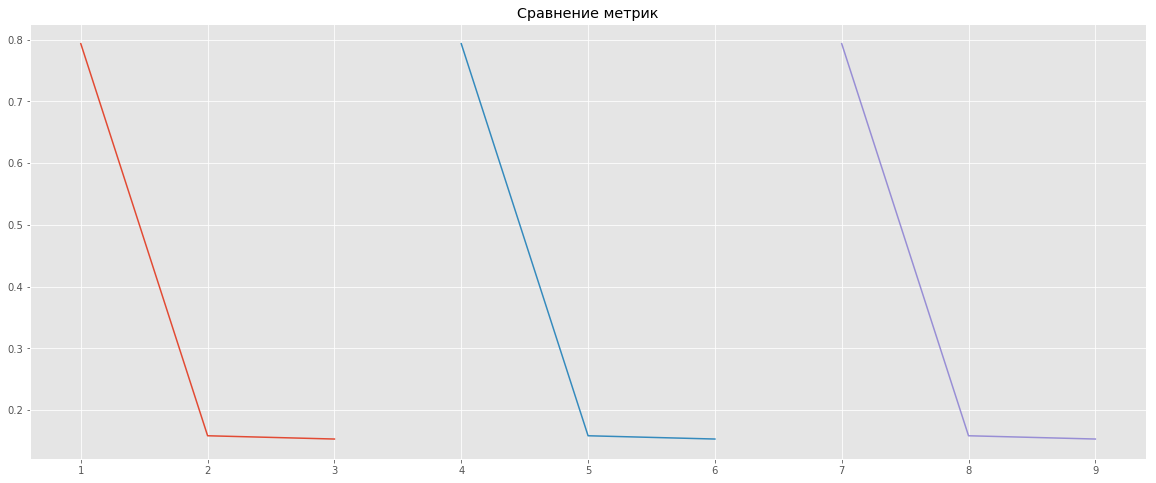

In [71]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here


plt.figure(figsize=(20,8))# график с 5 на 5 дюймов
plt.plot([1,2,3],[tree_ac,tree_pr,tree_re]) 
plt.plot([4,5,6],[ensemble_ac,ensemble_pr,ensemble_re]) #рисуем прямую линию y=x
plt.plot([7,8,9],[linear_ac,linear_pr,linear_re]) #рисуем прямую линию y=x
plt.title('Сравнение метрик') #наименование графика



roc_auc модели DecisionTreeClassifier 0.5188200659319759
roc_auc модели RandomForestClassifier 0.5797023639712746
roc_auc модели LogisticRegression 0.6453083341257849


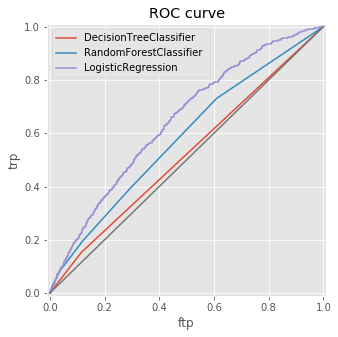

In [72]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt #загрузка библиотеки для графиков
from sklearn.metrics import roc_auc_score, roc_curve #импорт roc и auc roc
plt.figure(figsize=(5,5))# график с 5 на 5 дюймов
fpr, trp, threshold = roc_curve(y_test, tree_predict_proba[:,1]) 
plt.plot(fpr, trp) 
fpr, trp, threshold = roc_curve(y_test, ensemble_predict_proba[:,1]) 
plt.plot(fpr, trp) 
fpr, trp, threshold = roc_curve(y_test, linear_predict_proba[:,1]) 
plt.plot(fpr, trp)

plt.plot([0,1],[0,1]) #рисуем прямую линию y=x
plt.ylabel('trp') #наименование оси y
plt.xlabel('ftp') #наименование оси х
plt.grid(True) #выводим сетку
plt.title('ROC curve') #наименование графика
plt.xlim((-0.01, 1.01)) #ограничение по х
plt.ylim((-0.01, 1.01)) #ограничение по у

plt.legend(['DecisionTreeClassifier ','RandomForestClassifier ','LogisticRegression '])

print('roc_auc модели DecisionTreeClassifier', roc_auc_score(y_test, tree_predict_proba[:,1]))
print('roc_auc модели RandomForestClassifier', roc_auc_score(y_test, ensemble_predict_proba[:,1]))
print('roc_auc модели LogisticRegression', roc_auc_score(y_test, linear_predict_proba[:,1]))

In [73]:
from sklearn.model_selection import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here

tree_crossval = cross_val_score(tree,x_train,y_train,scoring='roc_auc',cv=10)
ensemble_crossval = cross_val_score(ensemble,x_train,y_train,scoring='roc_auc',cv=10)
linear_crossval = cross_val_score(linear,x_train,y_train,scoring='roc_auc',cv=10)

In [74]:
index = range(0,10)
tree_cv_roc = 0
ensemble_cv_roc = 0
linear_cv_roc = 0
for i in index:
    tree_cv_roc += tree_crossval[i]
    ensemble_cv_roc += ensemble_crossval[i]
    linear_cv_roc += linear_crossval[i]

print('Средний roc_auc для модели DecisionTreeClassifier', tree_cv_roc / 10)    
print('Средний roc_auc для модели RandomForestClassifier', ensemble_cv_roc / 10)
print('Средний roc_auc для модели LogisticRegression', linear_cv_roc / 10)
    

Средний roc_auc для модели DecisionTreeClassifier 0.5276589046315302
Средний roc_auc для модели RandomForestClassifier 0.6000511088106947
Средний roc_auc для модели LogisticRegression 0.6327162026882849


In [76]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

## Your Code Here

predict = linear.predict_proba(X_test)

ROC_AUC score для лучшей модели на проверочных данных: 0.6265729483282674


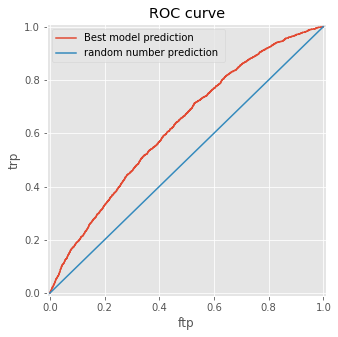

In [81]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

print ('ROC_AUC score для лучшей модели на проверочных данных:', roc_auc_score(Y_test, predict[:,1]))

## Your Code Here
plt.figure(figsize=(5,5))# график с 5 на 5 дюймов
fpr, trp, threshold = roc_curve(Y_test, predict[:,1]) 
plt.plot(fpr, trp) 
plt.plot([0,1],[0,1]) #рисуем прямую линию y=x
plt.ylabel('trp') #наименование оси y
plt.xlabel('ftp') #наименование оси х
plt.grid(True) #выводим сетку
plt.title('ROC curve') #наименование графика
plt.xlim((-0.01, 1.01)) #ограничение по х
plt.ylim((-0.01, 1.01)) #ограничение по у
plt.legend(['Best model prediction ','random number prediction '])

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)